<center>
<img src="logo.png" height="900"> 
</center>


#  Обсчёт АБ-теста

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эфект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [2]:
df1 = pd.read_csv('subscribers_1.csv', sep=',')
print(df1.shape)
df1.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

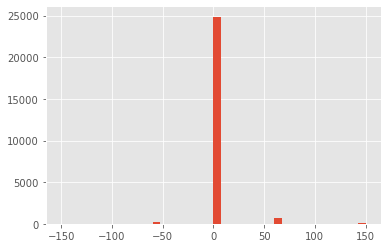

In [17]:
df1['duration_diff'] = df1['new_duration_days'] - df1['last_duration_days']
df1['duration_diff'].hist(bins=40)

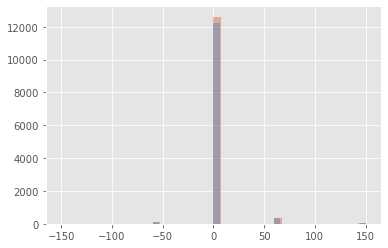

In [45]:
treatment = df1[df1['group'].astype(bool)]['duration_diff']
control = df1[~df1['group'].astype(bool)]['duration_diff']

treatment.hist(bins=40, alpha=0.4)
control.hist(bins=40, alpha=0.4)

In [46]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here


Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

In [47]:
treatment.mean(), control.mean()

(1.994826536822885, 2.139003987178485)

In [48]:
def z_test(a, b):
    z_obs = (a.mean() - b.mean()) / np.sqrt(a.var(ddof=1)/len(a) + b.var(ddof=1)/len(b))
    pvalue = 2 * (1 - sts.norm.cdf(z_obs))
    return z_obs, pvalue

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

z_obs, pvalue = z_test(control, treatment)

# your code here


In [52]:
z_obs, pvalue

(0.7476223219885133, 0.45468799669079174)

In [53]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [36]:
df2 = pd.read_csv('subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [40]:
df2['duration_diff'] = df2['last_duration_days'] - df2['new_duration_days']
df2

,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group,duration_diff
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0,0.0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2,0.0
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0,0.0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2,0.0
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0,-60.0
...,...,...,...,...,...,...,...,...,...,...,...
25930,12885753927,929,subscription,1_month,1,2019-03-14,30.0,30,1,0,0.0
25931,12885754861,929,subscription,1_month,1,2019-03-21,30.0,30,1,2,0.0
25932,12885758998,929,subscription,1_month,1,2019-03-24,30.0,30,1,2,0.0
25933,12885759604,929,subscription,1_month,1,2019-03-24,30.0,30,1,0,0.0


In [54]:
control1 = df2[df2['new_group'] == 0]['duration_diff']
control2 = df2[df2['new_group'] == 1]['duration_diff']
treatment = df2[df2['new_group'] == 2]['duration_diff']
treatment

1        0.0
3        0.0
7        0.0
8        0.0
15       0.0
        ... 
25921    0.0
25923    0.0
25926    0.0
25931    0.0
25932    0.0
Name: duration_diff, Length: 8831, dtype: float64

In [44]:
control1.mean(), control2.mean(), treatment.mean()

(-2.0237395698671996, -1.968586387434555, -2.201336202015627)

In [64]:
from statsmodels.sandbox.stats.multicomp import multipletests 
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you


pval_1 = z_test(control1, treatment)[1]
pval_2 = z_test(control2, treatment)[1]
hyp_cnt = sum(multipletests([pval_1, pval_2], alpha=0.01, method='fdr_bh')[0])

# your code here


In [66]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема?